In [1]:
%matplotlib widget
import virtuosopy as vp
import matplotlib.pyplot as plt

# This creates (or overwrites if it exists) a schematic called example_circuit under the vp_demonstration library
# If overwrite=True is not there and you try to create an instance that already exists you will get an error.
sch = vp.Schematic('vp_NCSU_examples', 'inverter', overwrite=True)

## create an nmos
nmos = sch.create_instance('NCSU_Analog_Parts', 'nmos4', [0.,0.], 'nmos')

# apply a width, length, and model
nmos['w'] = '1u'
nmos['l'] = '1u'
nmos['model'] = 'ami06N'
# print its details
print(nmos)

# connect the body to the source
sch.create_wire([nmos.pins.S, nmos.pins.B], 'gnd!')

## create a pmos
pmos = sch.create_instance('NCSU_Analog_Parts', 'pmos4', vp.ConnPos(nmos.pins.D, 'D', 'above'), 'pmos')

# apply a width, length, and model
pmos['w'] = '1u'
pmos['l'] = '1u'
pmos['model'] = 'ami06P'

# connect the body to the source
sch.create_wire([pmos.pins.S, pmos.pins.B], 'vdd!')

# connect the gates
sch.create_wire([nmos.pins.G, pmos.pins.G])

# connect input pin
pin_In = sch.create_pin('In', 'input', vp.ConnPos(nmos.pins.G, None, 'left', 2))
pin_Out = sch.create_pin('Out', 'output', vp.ConnPos(nmos.pins.D, None, 'right', 2))

# these parameters are not SI units and do not need CDF callbacks
sch.add_cdf_ignore(['ami06N', 'ami06P'])

if sch.save():
    print('error saving')
else:
    print('Save successful')

Instance Name:
	nmos
Library Name:
	NCSU_Analog_Parts
Cell Name:
	nmos4
Pin Names: 
	B, D, S, G, 
Parameter Names: 
	model, ModelType, m, fingers, w_microns, w_grid, w, MinW, l_grid, l, l_microns, MinL, ad, as, pd, ps, nrd, nrs, lxUseCell, ld, ls, off, Vds, Vgs, Vbs, trise, region, rdc, rsc, dtemp, geo, 
Applied Paramters: 
	w = 1u
	l = 1u
	model = ami06N

Save successful


Setting up Simulation...


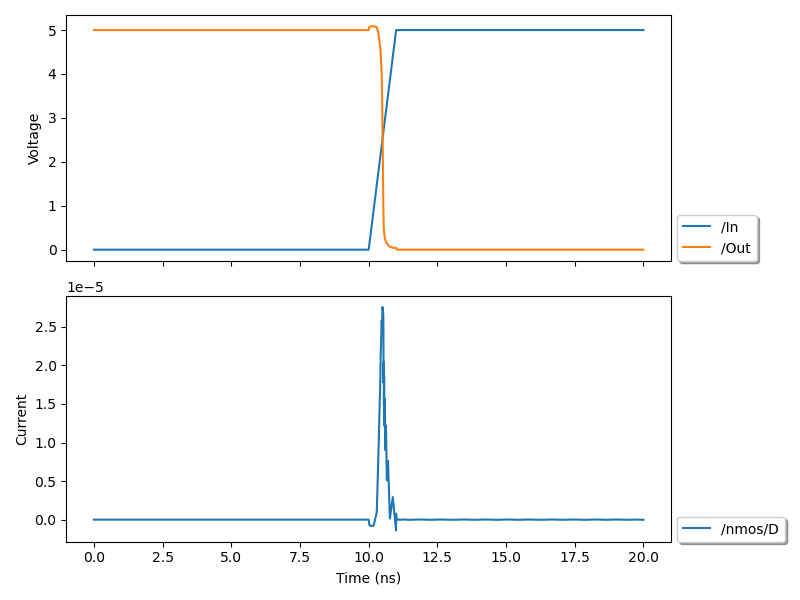

In [4]:
# Setup Simulator
print('Setting up Simulation...')
model_files = ['../../model/ami06/ami06P.m', '../../model/ami06/ami06N.m']

# simulate for 100ns
s = vp.Simulator(sch, model_files)
s.tran('20n')

# setup stimuli
stims = {}

# Piecewise linear voltage stimulus 
stims['In'] = {'type' : 'pwl', 'wave' : vp.create_wave([0.0, 5], 10e-9, 1e-9)}

# DC stimulus
stims['vdd!'] = {'type' : 'dc', 'voltage' : 5}
stims['gnd!'] = {'type' : 'dc', 'voltage' : 0.0}

# apply the stims
s.apply_stims(stims)

s.track_net('In')
s.track_net('Out')

s.track_pin(nmos.pins.D, group='current')

s.run(plot_in_v=False)

s.plot()


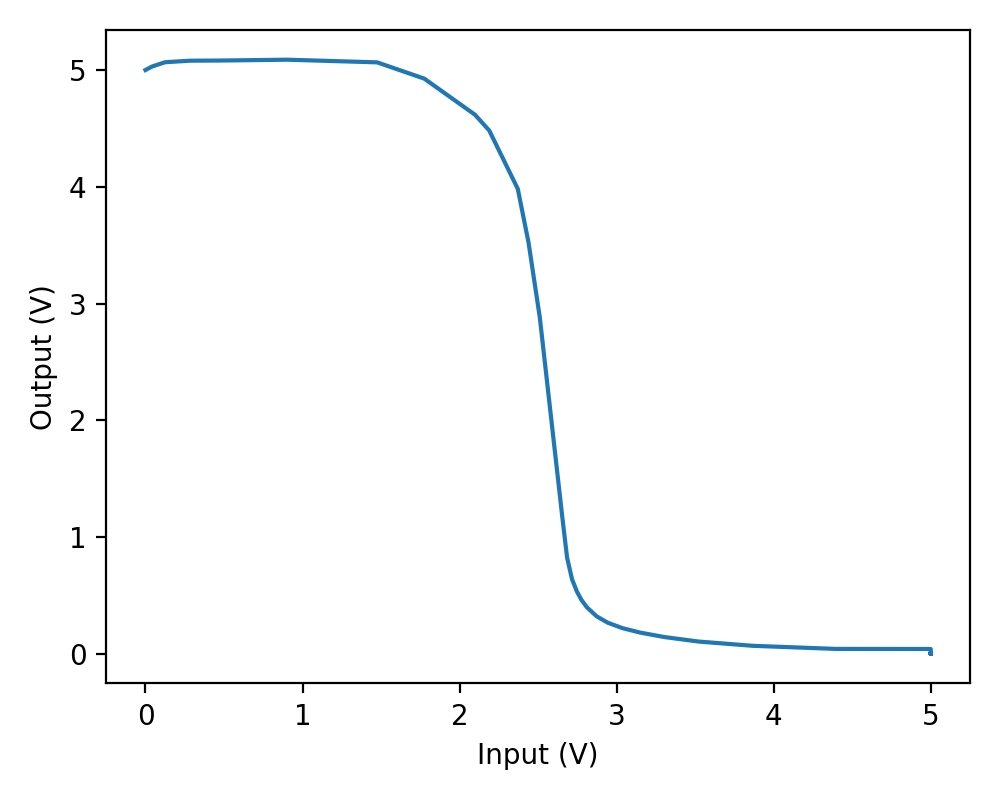

In [5]:
# create a VTC

x = s.waves['/In']['y'][0]
y = s.waves['/Out']['y'][0]

fig, ax = plt.subplots(1,1,figsize=(5,4), dpi=200)
plt.xlabel('Input (V)')
plt.ylabel('Output (V)')
plt.plot(x,y)
plt.tight_layout()
plt.show()

